In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_file = "City_of_Seattle_Wages_2.csv"

In [30]:
#open csv to df
df = pd.read_csv(csv_file)
df.head()

,Department,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Male Avg Hrly Rate,No. Male Empl,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate - percentage,Notes
0,Arts and Cultural Affairs,Accountant,NaN,NaN,29.75,1.0,29.75,1,39.0,NaN,No women in title
1,Arts and Cultural Affairs,Actg Tech III,26.79,1.0,NaN,NaN,26.79,1,56.0,NaN,No men in title
2,Arts and Cultural Affairs,Admin Spec III,26.26,1.0,NaN,NaN,26.26,1,37.0,NaN,No men in title
3,Arts and Cultural Affairs,Admin Staff Asst,31.76,2.0,NaN,NaN,31.76,2,99.0,NaN,No men in title
4,Arts and Cultural Affairs,Arts Conserv Tech,27.78,1.0,27.78,1.0,27.78,2,65.0,100.0,NaN


In [65]:
# sheri - group by by help code 
df.groupby([
    'Department'
]).agg({
    'No. Female Empl': "count",  # get the count of females
     'No. Male Empl': "count",  # get the count of males
})

,No. Female Empl,No. Male Empl
Department,,
Arts and Cultural Affairs,13,8
City Auditor,2,2
City Budget Office,6,3
City Employees Retirement Syst,8,4
City Light,169,210
Civil Service Commissions,3,1
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Ethics And Elections,1,4


In [105]:
# group departments and make into df 
chart_data_df = df.loc[(df["Department"] == "City Light") | 
                                       (df["Department"] == "Department of Planning & Dev") | 
                                       (df["Department"] == "Dept of Finance & Admn Svc") |
                                       (df["Department"] == "Seattle Dept of Transportation") |
                                       (df["Department"] == "Police Department") |
                                       (df["Department"] == "Seattle Center") |
                                       (df["Department"] == "Seattle Public Utilities"),:]

#print chart 
print(chart_data)
type(chart_data)

                    Department                      Jobtitle  \
39                  City Light                    Accountant   
40                  City Light               Accountant,Prin   
41                  City Light                 Accountant,Sr   
42                  City Light                      Act Exec   
43                  City Light                Actg Tech I-BU   
44                  City Light               Actg Tech II-BU   
45                  City Light              Actg Tech III-BU   
46                  City Light             Actg Tech Supv-BU   
47                  City Light                  Admin Spec I   
48                  City Light               Admin Spec I-BU   
49                  City Light                 Admin Spec II   
50                  City Light              Admin Spec II-BU   
51                  City Light                Admin Spec III   
52                  City Light             Admin Spec III-BU   
53                  City Light          

pandas.core.frame.DataFrame

In [99]:
# create new df with department and male femal values added 
chartData=chart_data_df.groupby([
    'Department'
]).agg({
    'No. Female Empl': "count",  # get the count of females
     'No. Male Empl': "count",  # get the count of males
})

In [100]:
# print chart 
chartData

,No. Female Empl,No. Male Empl
Department,,
City Light,169,210
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Police Department,82,82
Seattle Center,52,52
Seattle Dept of Transportation,85,111
Seattle Public Utilities,141,168


,No. Female Empl,No. Male Empl
Department,,
City Light,169,210
Department of Planning & Dev,57,58
Dept of Finance & Admn Svc,88,85
Police Department,82,82
Seattle Center,52,52
Seattle Dept of Transportation,85,111
Seattle Public Utilities,141,168


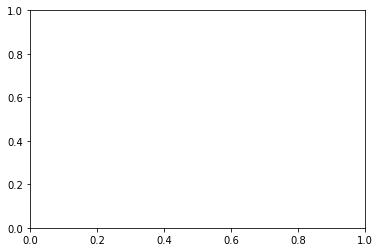

In [101]:
# set data 
af = pd.DataFrame(chartData, columns = [ 'No. Female Empl', 'No. Male Empl'])

result = plt.subplots()
#print 
af

                  

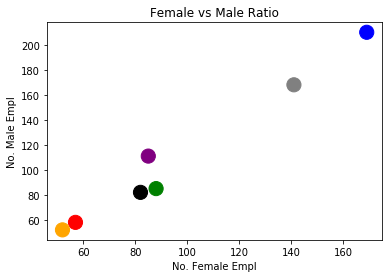

In [108]:
#create scatter plot 
#set values 
s = 200
c = ['blue', 'red', 'green', 'black', 'orange','purple','grey']
x = chartData["No. Female Empl"]
y = chartData["No. Male Empl"]
#format labels and title 
plt.title("Female vs Male Ratio")
plt.xlabel("No. Female Empl")
plt.ylabel("No. Male Empl")
plt.scatter(x, y, s, c)
